In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
transact = pd.read_csv('transactions/transactions.csv', parse_dates=True, index_col=[0])
transact.head()

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922


<AxesSubplot:xlabel='date'>

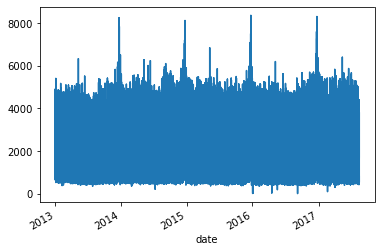

In [3]:
transact.transactions.plot()

In [4]:
txn = transact.resample('BM').sum()
txn.head()

,store_nbr,transactions
date,,
2013-01-31,36325,2289558
2013-02-28,33880,2169615
2013-03-29,35090,2285509
2013-04-30,38720,2518079
2013-05-31,38338,2467465


<AxesSubplot:xlabel='date'>

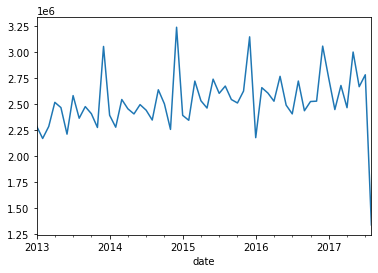

In [5]:
txn.transactions.plot()

In [6]:
txn1 = transact.resample('BM').mean()

<AxesSubplot:xlabel='date'>

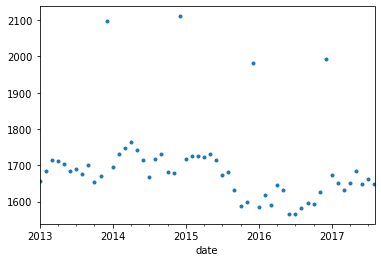

In [7]:
txn1.transactions.plot(style = '.')

In [8]:
txn.transactions.describe()

count    5.600000e+01
mean     2.526410e+06
std      2.830764e+05
min      1.335692e+06
25%      2.403073e+06
50%      2.507572e+06
75%      2.661968e+06
max      3.242434e+06
Name: transactions, dtype: float64

In [9]:
data = txn.transactions.rolling(window=12).mean() #finding the moving average

<AxesSubplot:xlabel='date'>

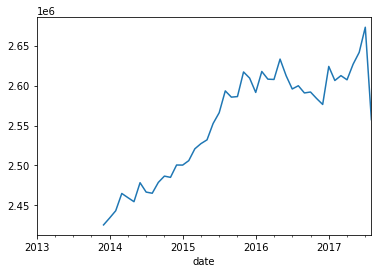

In [10]:
data.plot()

In [11]:
sales_data = pd.DataFrame(transact.transactions)
sales_data.head()

,transactions
date,
2013-01-01,770
2013-01-02,2111
2013-01-02,2358
2013-01-02,3487
2013-01-02,1922


In [12]:
sales_data.describe()

,transactions
count,83488.000000
mean,1694.602158
std,963.286644
min,5.000000
25%,1046.000000
50%,1393.000000
75%,2079.000000
max,8359.000000


<AxesSubplot:xlabel='date'>

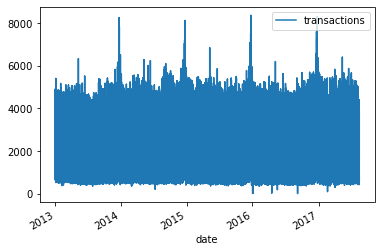

In [13]:
sales_data.plot(style='-')

In [14]:
base_sales = pd.concat([sales_data, sales_data.shift(1)], axis=1)
base_sales

,transactions,transactions
date,,
2013-01-01,770,NaN
2013-01-02,2111,770.0
2013-01-02,2358,2111.0
2013-01-02,3487,2358.0
2013-01-02,1922,3487.0
...,...,...
2017-08-15,2804,2814.0
2017-08-15,1573,2804.0
2017-08-15,2255,1573.0


In [15]:
base_sales.columns=['actual_transactions','forecast_transactions'] #renaming the new columns

In [16]:
base_sales.head()

,actual_transactions,forecast_transactions
date,,
2013-01-01,770,NaN
2013-01-02,2111,770.0
2013-01-02,2358,2111.0
2013-01-02,3487,2358.0
2013-01-02,1922,3487.0


In [17]:
base_sales.dropna(inplace=True) #allow inplace true for actual value change

In [18]:
base_sales

,actual_transactions,forecast_transactions
date,,
2013-01-02,2111,770.0
2013-01-02,2358,2111.0
2013-01-02,3487,2358.0
2013-01-02,1922,3487.0
2013-01-02,1903,1922.0
...,...,...
2017-08-15,2804,2814.0
2017-08-15,1573,2804.0
2017-08-15,2255,1573.0


In [19]:
from sklearn.metrics import mean_squared_error


In [20]:
transactions_error = mean_squared_error(base_sales.actual_transactions, base_sales.forecast_transactions)
transactions_error #mean squared error value

788036.7550636627

In [21]:
err_val = np.sqrt(transactions_error)
err_val #error value

887.7143431665744

In [22]:
#implementing ARIMA model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

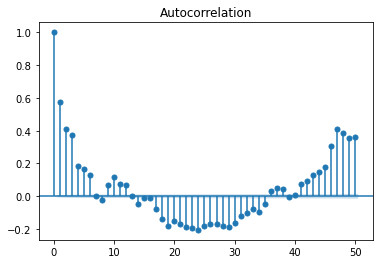

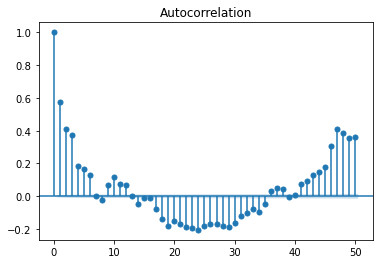

In [23]:
plot_acf(sales_data)

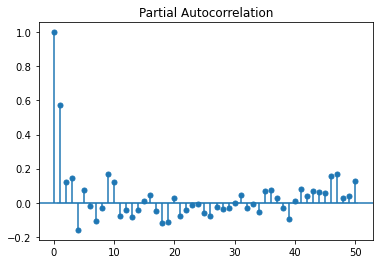

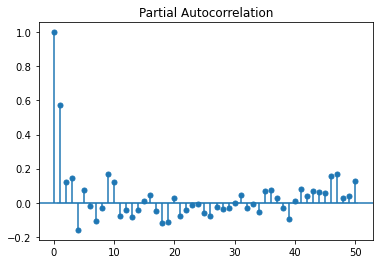

In [24]:
plot_pacf(sales_data)

In [25]:
#next, remove the trend and seasonality factors for better prediction results

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
#get training and test datasets
#train data with actual dataset and evaluate its performance with the rest of the dataset
sales_train = sales_data[0:20000]
sales_test = sales_data[20000:]

In [28]:
sales_model = ARIMA(sales_train, order=(2,1,2))
#model = sm.tsa.arima.ARIMA(train_data, order=(1,1,2)) - resolve warning issue with latest update
#result = model.fit()

C:\Users\The Oyondi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\The Oyondi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated

In [29]:
results = sales_model.fit() #NB the larger the training dataset, the more memory is used, which may lead to a crash - float64

In [30]:
#AIC - archaic information criteria - checks how good the model fits
results.aic

323460.07928241254

In [31]:
sales_forecast = results.forecast(steps=63488)[0]

In [32]:
np.sqrt(mean_squared_error(sales_test, sales_forecast)) #-best model p=2,q=2,d=1

972.6640367637647

In [33]:
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train, test = sales_data[0:10],sales_data[10:]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(test, order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test, predictions)
                    print("ARIMA %s MSE %.2f"% (order,error))
                except:
                    continue
            

In [ ]:
from statsmodels.api import show_versions
show_versions()